# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [8]:
raw_data = pd.read_csv("real_estate_price_size_year_view.csv")

In [9]:
raw_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [10]:
raw_data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


## Create a dummy variable for 'view'

In [11]:
data = raw_data.copy()

In [12]:
data["view"] = data["view"].map({"No sea view": 0, "Sea view": 1})

In [13]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


## Create the regression

### Declare the dependent and the independent variables

In [14]:
y = data['price']
x1 = data[['size','year','view']]

### Regression

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.02e-50
Time:                        20:36:34   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

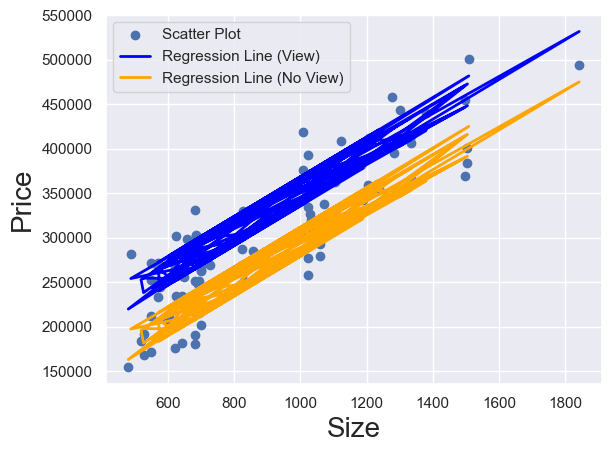

In [19]:
# Create a scatter plot of 'size' (x-axis) and 'price' (y-axis)
plt.scatter(data['size'], y, label='Scatter Plot')

# Define your independent variables
x = data[["size", "year", "view"]]
x = sm.add_constant(x)  # Add a constant term for the intercept

# Define the coefficients obtained from your OLS regression model
coef_const = -5398000
coef_size = 223.0316
coef_year = 2718.9489
coef_view = 56730

# Calculate the predicted values for 'price' based on the coefficients
yhat_view = coef_const + coef_size * data['size'] + coef_year * data['year'] + coef_view
yhat_no_view = coef_const + coef_size * data['size'] + coef_year * data['year']

# Plot the two regression lines
plt.plot(data['size'], yhat_view, lw=2, c='blue', label='Regression Line (View)')
plt.plot(data['size'], yhat_no_view, lw=2, c='orange', label='Regression Line (No View)')

# Name your axes and add a legend
plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.legend()

# Show the plot
plt.show()
